In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
sys.path.append("/data/user/tchau/Sandbox/GC_OscNext/PDFs")
sys.path.append("/data/user/tchau/Sandbox/GC_OscNext/DetResponse")
sys.path.append("/data/user/tchau/Sandbox/GC_OscNext/Utils")

from Detector import *
from Signal import *
from Plot_Histogram import *


: 

# <font color="darkmagenta"> PDFs computation functions </font>

In [65]:
# channel and mass
channel = "WW"
mass = 8000
profile='NFW'
# Bin
Bin = Std_Binning(1300)
Reco = RecoRate(channel, 
            mass, 
            profile, 
            Bin,
            type="Resp")
        

In [66]:
RecoHist = Reco.ComputeRecoRate()

********************
Buiding final reco rate using Resp method
********************
Computing true rate with Charon spectra
channel: WW || mass: 8000 || profile: NFW || process: ann

Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
********************
Computing Response Matrix
********************
Accessing MC set 0000


In [67]:
Reco_evtbyevt = RecoRate(channel, 
            mass, 
            profile, 
            Bin,
            type="evtbyevt",
            spectra='Charon')

In [68]:
RecoHist_evtbyevt = Reco_evtbyevt.ComputeRecoRate()
true = Reco_evtbyevt.ComputeTrueRate()

********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
##Applying cut on weight##
Weight lim: 30698211342548.52
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
##Applying cut on weight##
Weight lim: 5399835012572.759
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
##Applying cut on weight##
Weight lim: 18290513172919.613
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
##Applying cut on weight##
Weight lim: 15584871386511.139
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
##Applying cut on weight##
Weight lim: 22541816424695.1

In [69]:
# np.sum(Reco.hist['RecoRate'])
np.sum(Reco.hist['RecoRate'])/np.sum(Reco_evtbyevt.hist['RecoRate'])


0.9116403818242055

/tmp/ipykernel_25273/345160216.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(Reco.hist['TrueRate']['nu_tau']/np.sum(Reco.hist['TrueRate']['nu_tau']), np.array([Bin['true_psi_edges'], Bin['true_energy_edges']]), "Psi", "Energy", "Charon", zlogscale=True)


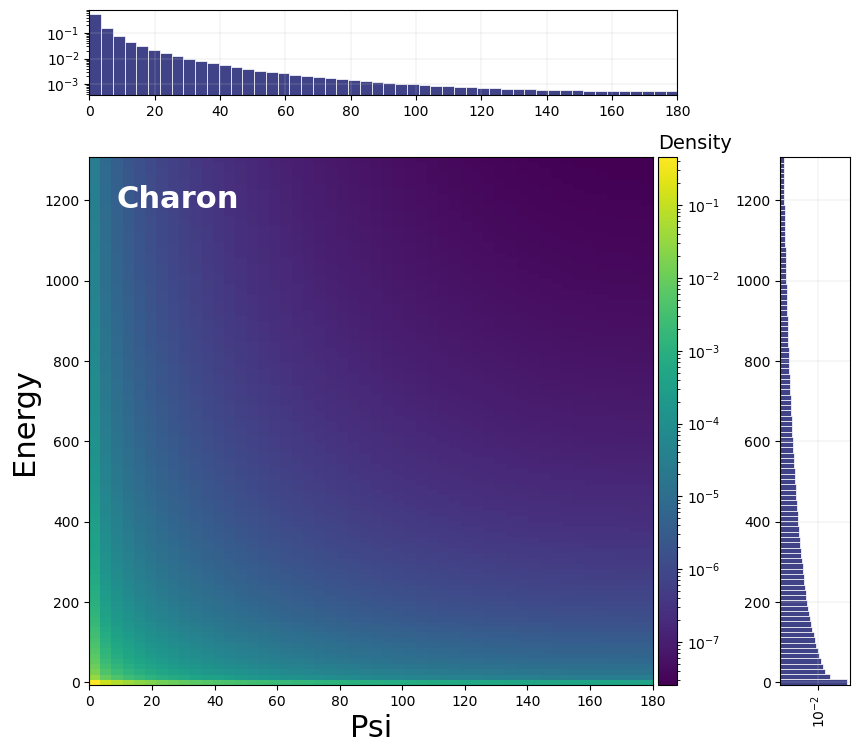

/tmp/ipykernel_25273/345160216.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(Reco_evtbyevt.hist['TrueRate']['nu_tau']/np.sum(Reco_evtbyevt.hist['TrueRate']['nu_tau']), np.array([Bin['true_psi_edges'], Bin['true_energy_edges']]), "Psi", "Energy", "Charon", zlogscale=True)


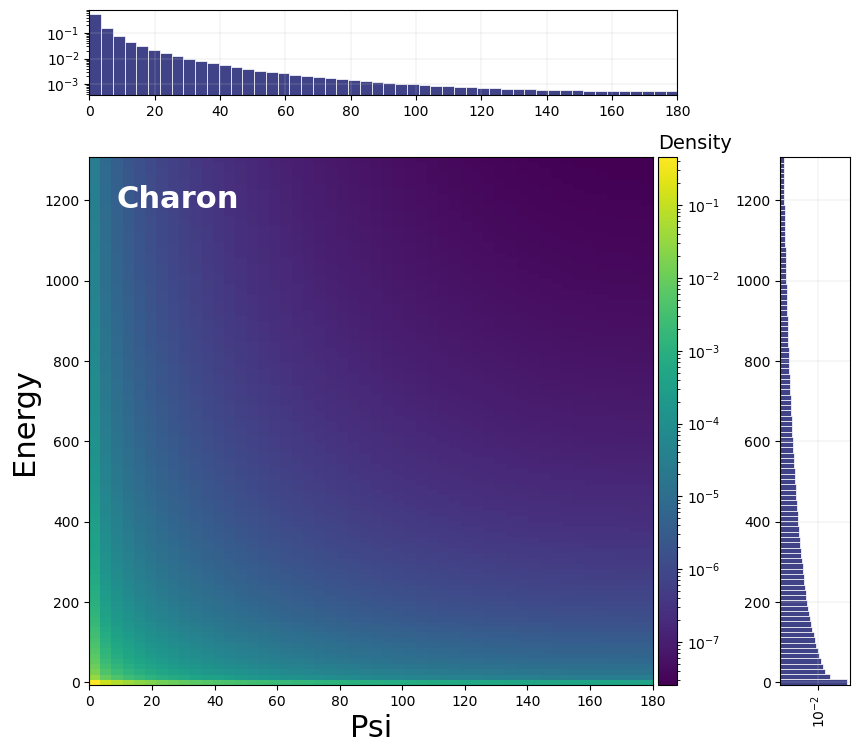

In [70]:
plot_projections(Reco.hist['TrueRate']['nu_tau']/np.sum(Reco.hist['TrueRate']['nu_tau']), np.array([Bin['true_psi_edges'], Bin['true_energy_edges']]), "Psi", "Energy", "Charon", zlogscale=True)
plot_projections(Reco_evtbyevt.hist['TrueRate']['nu_tau']/np.sum(Reco_evtbyevt.hist['TrueRate']['nu_tau']), np.array([Bin['true_psi_edges'], Bin['true_energy_edges']]), "Psi", "Energy", "Charon", zlogscale=True)


/tmp/ipykernel_25273/2435153175.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(RecoHist_evtbyevt/np.sum(RecoHist_evtbyevt), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"$log_{10}(E_{reco})$", "Charon\n evtbyevt reweighted\n"+ r"$b\bar{b}$"+"- {} GeV".format(mass))


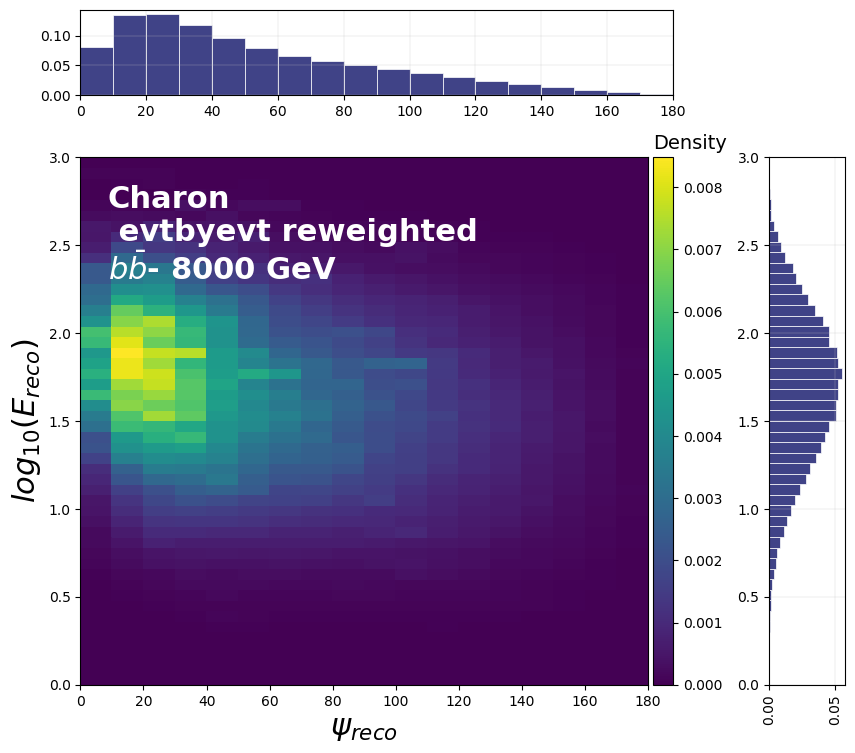

/tmp/ipykernel_25273/2435153175.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(RecoHist/np.sum(RecoHist), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"$log_{10}(E_{reco})$", "Charon\n Flux x Resp\n"+ r"$b\bar{b}$"+"- {} GeV \n NFW".format(mass))


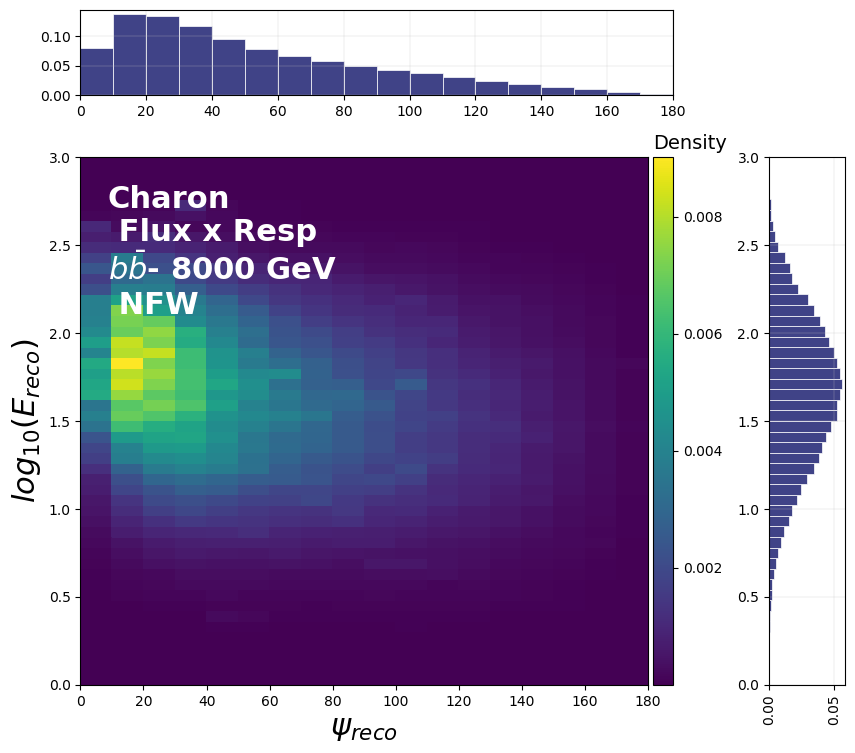

In [71]:
plot_projections(RecoHist_evtbyevt/np.sum(RecoHist_evtbyevt), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"$log_{10}(E_{reco})$", "Charon\n evtbyevt reweighted\n"+ r"$b\bar{b}$"+"- {} GeV".format(mass))
plot_projections(RecoHist/np.sum(RecoHist), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"$log_{10}(E_{reco})$", "Charon\n Flux x Resp\n"+ r"$b\bar{b}$"+"- {} GeV \n NFW".format(mass))


Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2012_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2013_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2014_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2015_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2016_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2017_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscN

/tmp/ipykernel_27591/2438129425.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(Bkg_bwISJ/np.sum(Bkg_bwISJ), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"$log_{10}(E_{reco})$", "Scrambled Signal \n Charon\n"+ r"$b\bar{b}$"+"- {} GeV".format(mass))


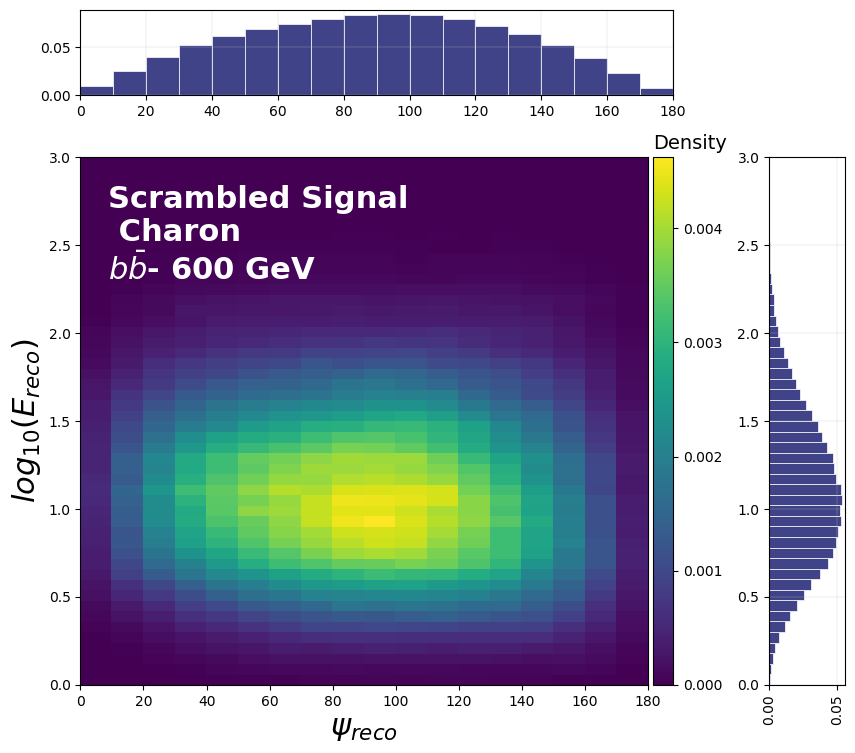

In [85]:
Bkg_bwISJ = ScrambleBkg(Bin, bw="ISJ", oversample=10)
plot_projections(Bkg_bwISJ/np.sum(Bkg_bwISJ), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"$log_{10}(E_{reco})$", "RA Scramble Bkg".format(mass))


Text(0.5, 1.0, 'Projection 1st $\\psi$ bin')

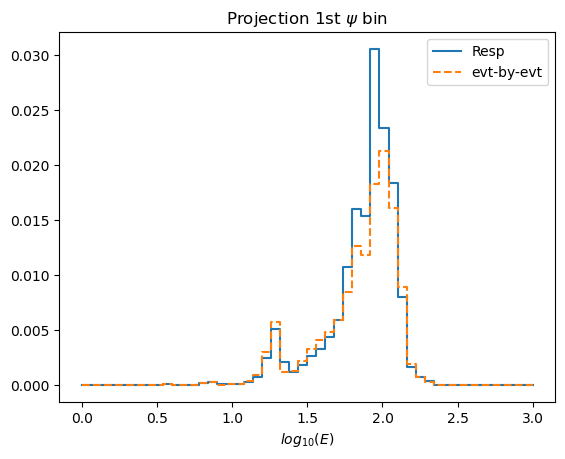

In [14]:
binE = 100
binPsi = 1

psi_evtbyevt = np.array([(RecoHist_evtbyevt/np.sum(RecoHist_evtbyevt))[binPsi][j] for j in range(RecoHist_evtbyevt.shape[1])])
psi_Resp = np.array([(RecoHist/np.sum(RecoHist))[binPsi][j] for j in range(RecoHist.shape[1])])


h1 = hist_line(psi_Resp, np.log10(Bin["reco_energy_edges"]))
h2 = hist_line(psi_evtbyevt, np.log10(Bin["reco_energy_edges"]))
plt.plot(h1[0], h1[1], label='Resp')
plt.plot(h2[0], h2[1], ls='--', label='evt-by-evt')
plt.legend()
plt.xlabel(r'$log_{10} (E)$')
plt.title(r'Projection 1st $\psi$ bin')


In [123]:
# channel and mass
channel = "numunumu"
mass = 50
profile='NFW'
# Bin
Bin = Std_Binning(mass)
Reco_Scr = RecoRate(channel, 
            mass, 
            profile, 
            Bin,
            type="Resp",
            Scramble=True)
Rate_Scr = Reco_Scr.ComputeRecoRate()

********************
Buiding final reco rate using Resp method
********************
Computing true rate with Charon spectra
channel: numunumu || mass: 50 || profile: NFW || process: ann

Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTHIA.hdf5
********************
Computing Response Matrix
********************
Accessing MC set 0000


/tmp/ipykernel_27591/601497542.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(Rate_Scr/np.sum(Rate_Scr), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"$log_{10}(E_{reco})$", "Scrambled Signal \n Flux x Scrambled_Resp \n Charon\n"+ r"$\nu_\mu \bar{\nu}_\mu$"+"- {} GeV".format(mass))


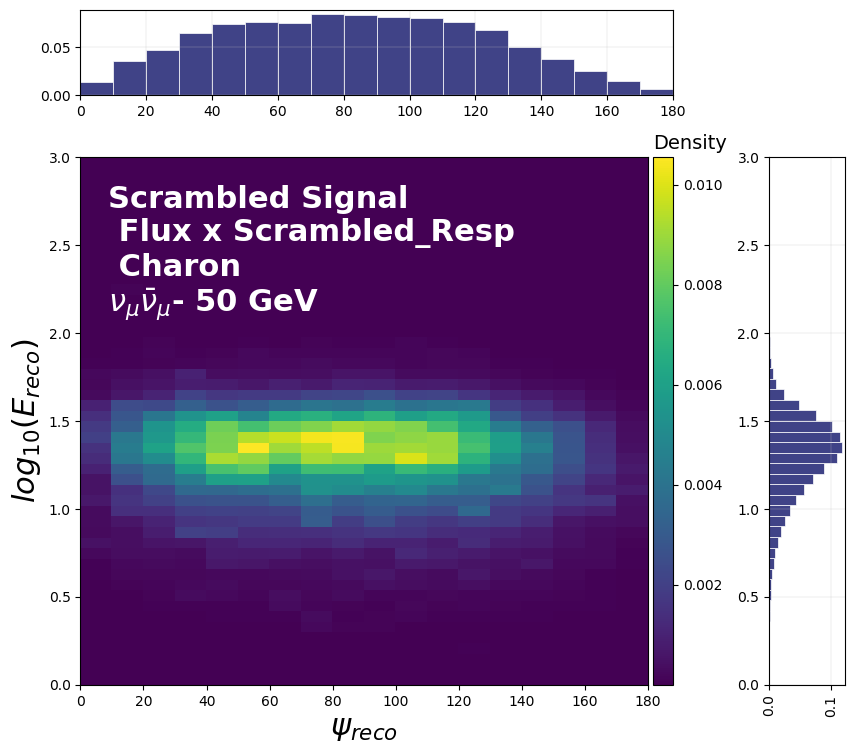

In [125]:
plot_projections(Rate_Scr/np.sum(Rate_Scr), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"$log_{10}(E_{reco})$", "Scrambled Signal \n Flux x Scrambled_Resp \n Charon\n"+ r"$\nu_\mu \bar{\nu}_\mu$"+"- {} GeV".format(mass))


# <font color="darkmagenta"> Nadege </font>

In [64]:
# Accessing Nadege's result:
file1 = "OscNext_L7_v02.00_1X0000_PDF_Signal_PID3_psi18_E50_sklearnKDEappliedfromReco_0.03Bandwidth_RemovedHighWeightEventTrue_PostCutFinalL7_PPPC4Spectra_PredefinedBinning_UncertaintyIncluded_newCuts.pkl"
file2 = "OscNext_L7_v02.00_1X0000_PDF_Signal_PID3_psi18_E50_sklearnKDEappliedfromReco_0.03Bandwidth_RemovedHighWeightEventTrue_PostCutFinalL7_PPPC4Spectra_PredefinedBinning_UncertaintyIncluded.pkl"

nadege1 = pkl.load(open("/data/user/niovine/projects/DarkMatter_OscNext/Histograms/Signal/PPPC4/{}".format(file1), "rb"))
nadege2 = pkl.load(open("/data/user/niovine/projects/DarkMatter_OscNext/Histograms/Signal/PPPC4/{}".format(file2), "rb"))

In [71]:
Nad = nadege2['NFW_numunumu_50']['PDF']
pdf_nadege = Nad[0] +  Nad[1] +  Nad[2]

/tmp/ipykernel_27591/754138617.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(pdf_nadege/np.sum(pdf_nadege), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"log$_{10}(E_{reco})$", r"PPPC4"+"\n"+"evt-by-evt reweighted" "\n" r"$\nu_\mu \bar{\nu}_\mu$, 50 GeV" "\n" "NFW")


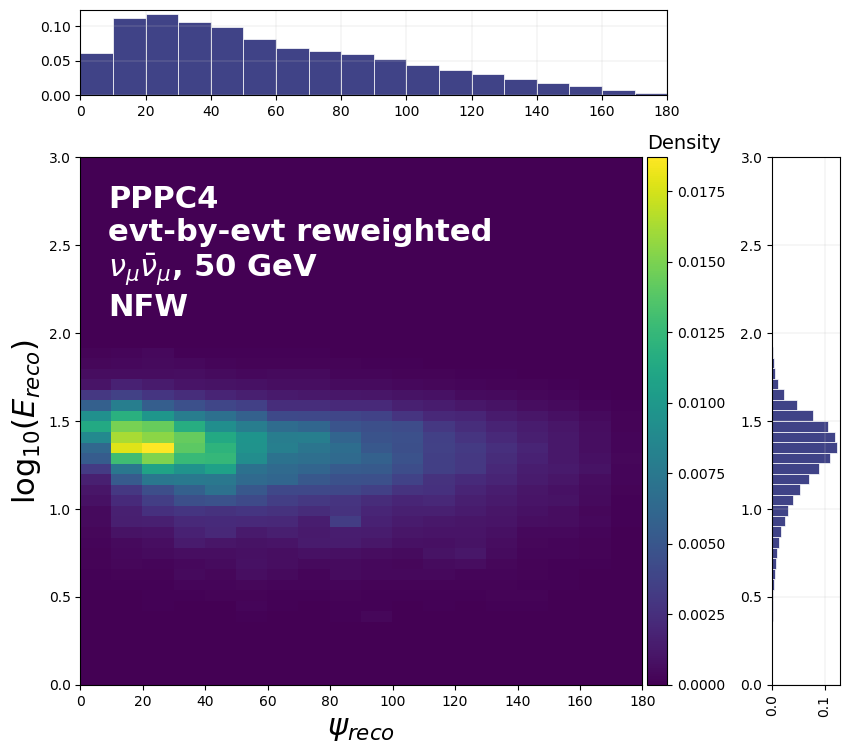

In [72]:
plot_projections(pdf_nadege/np.sum(pdf_nadege), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"log$_{10}(E_{reco})$", r"PPPC4"+"\n"+"evt-by-evt reweighted" "\n" r"$\nu_\mu \bar{\nu}_\mu$, 50 GeV" "\n" "NFW")